# Simple ML classification

In [1]:
from tensorflow import keras

from matplotlib import pyplot as plt
import seaborn as sn
import numpy as np

from sklearn.metrics import confusion_matrix, top_k_accuracy_score, accuracy_score

import time

## Data preprocessing

In [2]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

x_train = x_train.astype('float32')  / 255
x_train_batched = x_train.reshape(60000, 1, 28, 28)
x_test = x_test.astype('float32') / 255
x_test_batched = x_test.reshape(10000, 1, 28, 28)

y_train_categorical = keras.utils.to_categorical(y_train)

## Main test function

In [3]:
def analyze_model(model, _x_train, _x_test, _y_train, _y_test, single_epoch=False):
    print("Model fitting...")
    start_time = time.time()
    model.fit(_x_train, _y_train, epochs=1)
    epoch_1_time = time.time() - start_time
    print("Single epoch takes", epoch_1_time, "seconds")
    if not single_epoch:
        model.fit(_x_train, _y_train, epochs=9)
        epoch_10_time = time.time() - start_time
        print("Total learning time is", epoch_10_time, "seconds")
    print("Fitting done. Model testing...")
    preds_class = []
    preds_proba = model.predict(_x_test)
    for probs in preds_proba:
        preds_class.append(np.argmax(probs))

    top1 = accuracy_score(y_test, preds_class)
    top5 = top_k_accuracy_score(y_test, preds_proba)

    print("Top-1 accuracy is", top1)
    print("Top-5 accuracy is", top5)
    print("Confusion matrix")
    plt.figure(figsize = (10,7))
    sn.heatmap(confusion_matrix(y_test, preds_class, ), annot=True)
    plt.show()

## Fully connected model

In [4]:
model_fully_connected = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(784, activation='relu'),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(10),
    keras.layers.Softmax()
])

model_fully_connected.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001),
              loss=keras.losses.CategoricalCrossentropy(),
              metrics=[keras.metrics.TopKCategoricalAccuracy(k=1, name="top1"), keras.metrics.TopKCategoricalAccuracy(k=5, name="top5")])

Model fitting...
1875/1875 [==============================] - 6s 2ms/step - loss: 0.2404 - top1: 0.9294 - top5: 0.9932
Single epoch takes 5.702281951904297 seconds
Epoch 1/9
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1098 - top1: 0.9694 - top5: 0.9983
Epoch 2/9
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0791 - top1: 0.9774 - top5: 0.9990
Epoch 3/9
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0620 - top1: 0.9829 - top5: 0.9992
Epoch 4/9
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0526 - top1: 0.9851 - top5: 0.9994
Epoch 5/9
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0443 - top1: 0.9877 - top5: 0.9995
Epoch 6/9
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0402 - top1: 0.9892 - top5: 0.9995
Epoch 7/9
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0360 - top1: 0.9908 - top5: 0.9995
Epoch 8/9
1875/1875 [==============================]

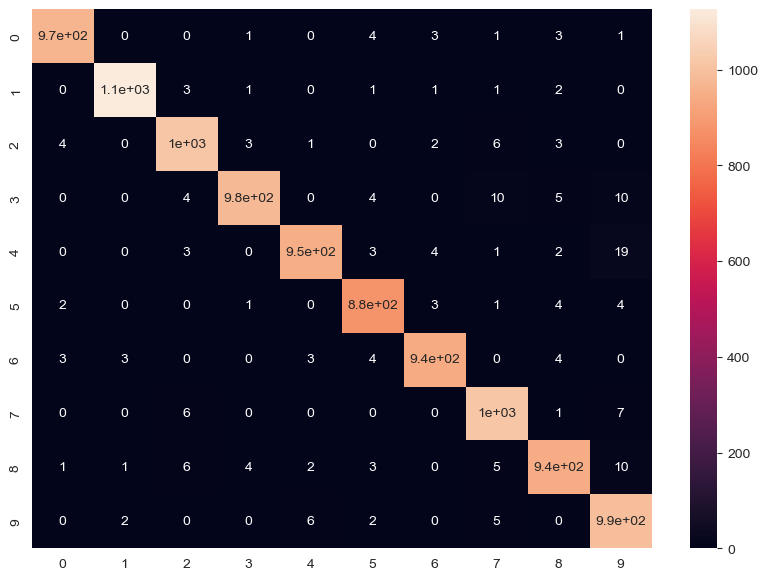

In [5]:
analyze_model(model_fully_connected, x_train, x_test, y_train_categorical, y_test)

## Small handwritten convolutional model

In [6]:
from models.CNN import CNN

In [7]:
model_hw_cnn = CNN()

Model fitting...
Epoch 0, sample 0 loss: 0.11257363595074399
Epoch 0, sample 1000 loss: 0.08684597901309045
Epoch 0, sample 2000 loss: 0.09571247674575029
Epoch 0, sample 3000 loss: 0.09239269369131095
Epoch 0, sample 4000 loss: 0.08937964556365138
Epoch 0, sample 5000 loss: 0.08776647376128877
Epoch 0, sample 6000 loss: 0.08975522237908684
Epoch 0, sample 7000 loss: 0.08888066654092718
Epoch 0, sample 8000 loss: 0.08785595793946775
Epoch 0, sample 9000 loss: 0.08821689012131903
Epoch 0, sample 10000 loss: 0.08463763163939955
Epoch 0, sample 11000 loss: 0.07805636563094168
Epoch 0, sample 12000 loss: 0.09417331244341856
Epoch 0, sample 13000 loss: 0.08692063091779957
Epoch 0, sample 14000 loss: 0.08356746248952769
Epoch 0, sample 15000 loss: 0.09442000493889574
Epoch 0, sample 16000 loss: 0.08523666853168035
Epoch 0, sample 17000 loss: 0.09238875543856023
Epoch 0, sample 18000 loss: 0.08915947900827029
Epoch 0, sample 19000 loss: 0.08559102413659553
Epoch 0, sample 20000 loss: 0.097012

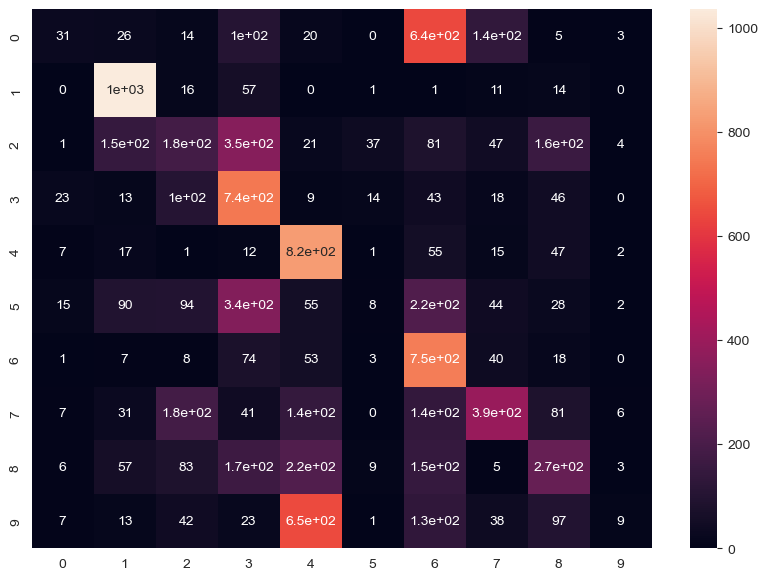

In [8]:
analyze_model(model_hw_cnn, x_train.reshape(60000, 1, 28, 28), x_test, y_train_categorical, y_test, single_epoch=True)

## Tensorflow network with same architecture

In [6]:
model_hw_tf = keras.Sequential([
    keras.layers.Conv2D(5, (3, 3), activation='sigmoid', input_shape=(28, 28, 1)),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(10, (3, 3), activation='sigmoid'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dense(10, activation='sigmoid'),
    keras.layers.Dense(10, activation='sigmoid'),
    keras.layers.Softmax()
])

model_hw_tf.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001),
              loss=keras.losses.CategoricalCrossentropy(),
              metrics=[keras.metrics.TopKCategoricalAccuracy(k=1, name="top1"), keras.metrics.TopKCategoricalAccuracy(k=5, name="top5")])

Model fitting...
1875/1875 [==============================] - 7s 2ms/step - loss: 2.0639 - top1: 0.5256 - top5: 0.8519
Single epoch takes 6.761791944503784 seconds
Epoch 1/9
1875/1875 [==============================] - 4s 2ms/step - loss: 1.7259 - top1: 0.8665 - top5: 0.9902
Epoch 2/9
1875/1875 [==============================] - 4s 2ms/step - loss: 1.6265 - top1: 0.9071 - top5: 0.9931
Epoch 3/9
1875/1875 [==============================] - 4s 2ms/step - loss: 1.5821 - top1: 0.9262 - top5: 0.9954
Epoch 4/9
1875/1875 [==============================] - 4s 2ms/step - loss: 1.5546 - top1: 0.9370 - top5: 0.9967
Epoch 5/9
1875/1875 [==============================] - 4s 2ms/step - loss: 1.5367 - top1: 0.9448 - top5: 0.9972
Epoch 6/9
1875/1875 [==============================] - 4s 2ms/step - loss: 1.5252 - top1: 0.9500 - top5: 0.9977
Epoch 7/9
1875/1875 [==============================] - 4s 2ms/step - loss: 1.5174 - top1: 0.9543 - top5: 0.9979
Epoch 8/9
1875/1875 [==============================]

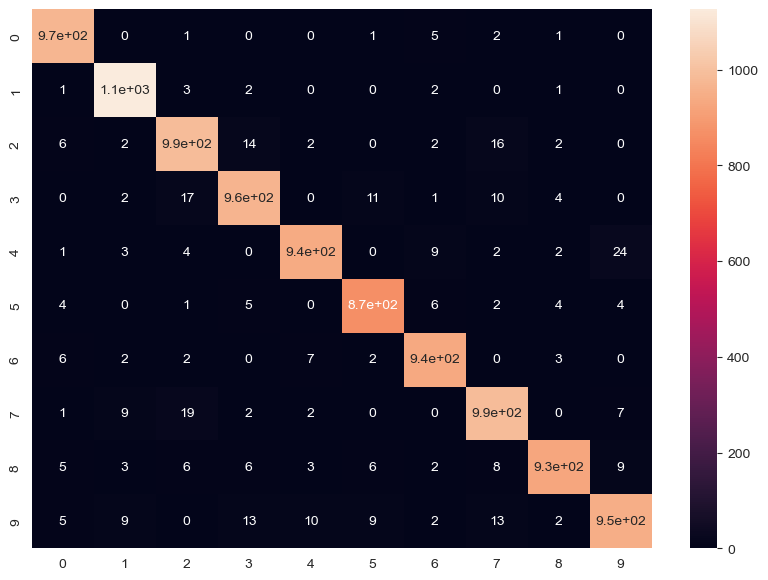

In [7]:
analyze_model(model_hw_tf, x_train, x_test, y_train_categorical, y_test)

## Convolutional network

In [8]:
model_conv = keras.Sequential([
    keras.layers.Conv2D(32, (3, 3), activation='sigmoid', input_shape=(28, 28, 1)),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(64, (3, 3), activation='sigmoid'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dense(64, activation='sigmoid'),
    keras.layers.Dense(32, activation='sigmoid'),
    keras.layers.Dense(10, activation='sigmoid'),
    keras.layers.Softmax()
])

model_conv.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001),
              loss=keras.losses.CategoricalCrossentropy(),
              metrics=[keras.metrics.TopKCategoricalAccuracy(k=1, name="top1"), keras.metrics.TopKCategoricalAccuracy(k=5, name="top5")])

Model fitting...
1875/1875 [==============================] - 4s 2ms/step - loss: 2.1124 - top1: 0.3759 - top5: 0.6832
Single epoch takes 4.355683326721191 seconds
Epoch 1/9
1875/1875 [==============================] - 4s 2ms/step - loss: 1.5509 - top1: 0.9471 - top5: 0.9979
Epoch 2/9
1875/1875 [==============================] - 4s 2ms/step - loss: 1.5037 - top1: 0.9668 - top5: 0.9991
Epoch 3/9
1875/1875 [==============================] - 4s 2ms/step - loss: 1.4845 - top1: 0.9786 - top5: 0.9993
Epoch 4/9
1875/1875 [==============================] - 4s 2ms/step - loss: 1.4784 - top1: 0.9825 - top5: 0.9994
Epoch 5/9
1875/1875 [==============================] - 4s 2ms/step - loss: 1.4751 - top1: 0.9857 - top5: 0.9994
Epoch 6/9
1875/1875 [==============================] - 4s 2ms/step - loss: 1.4730 - top1: 0.9873 - top5: 0.9996
Epoch 7/9
1875/1875 [==============================] - 4s 2ms/step - loss: 1.4715 - top1: 0.9891 - top5: 0.9996
Epoch 8/9
1875/1875 [==============================]

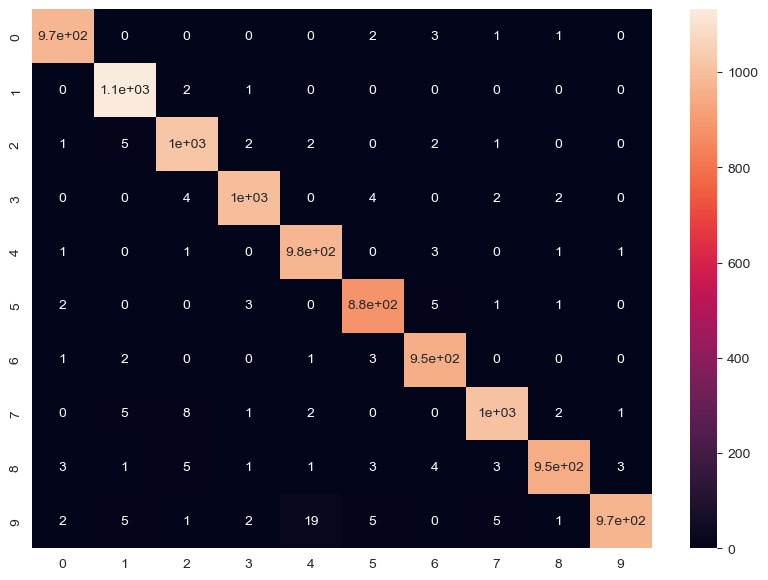

In [9]:
analyze_model(model_conv, x_train, x_test, y_train_categorical, y_test)

In [12]:
model_conv_relu = keras.Sequential([
    keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dense(64, activation='sigmoid'),
    keras.layers.Dense(32, activation='sigmoid'),
    keras.layers.Dense(10, activation='sigmoid'),
    keras.layers.Softmax()
])

model_conv_relu.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001),
              loss=keras.losses.CategoricalCrossentropy(),
              metrics=[keras.metrics.TopKCategoricalAccuracy(k=1, name="top1"), keras.metrics.TopKCategoricalAccuracy(k=5, name="top5")])

Model fitting...
1875/1875 [==============================] - 5s 2ms/step - loss: 1.6333 - top1: 0.9338 - top5: 0.9881
Single epoch takes 4.708741664886475 seconds
Epoch 1/9
1875/1875 [==============================] - 4s 2ms/step - loss: 1.4888 - top1: 0.9824 - top5: 0.9991
Epoch 2/9
1875/1875 [==============================] - 4s 2ms/step - loss: 1.4761 - top1: 0.9880 - top5: 0.9995
Epoch 3/9
1875/1875 [==============================] - 4s 2ms/step - loss: 1.4715 - top1: 0.9909 - top5: 0.9996
Epoch 4/9
1875/1875 [==============================] - 4s 2ms/step - loss: 1.4689 - top1: 0.9929 - top5: 0.9998
Epoch 5/9
1875/1875 [==============================] - 4s 2ms/step - loss: 1.4672 - top1: 0.9942 - top5: 0.9998
Epoch 6/9
1875/1875 [==============================] - 4s 2ms/step - loss: 1.4662 - top1: 0.9953 - top5: 0.9998
Epoch 7/9
1875/1875 [==============================] - 4s 2ms/step - loss: 1.4651 - top1: 0.9963 - top5: 0.9998
Epoch 8/9
1875/1875 [==============================]

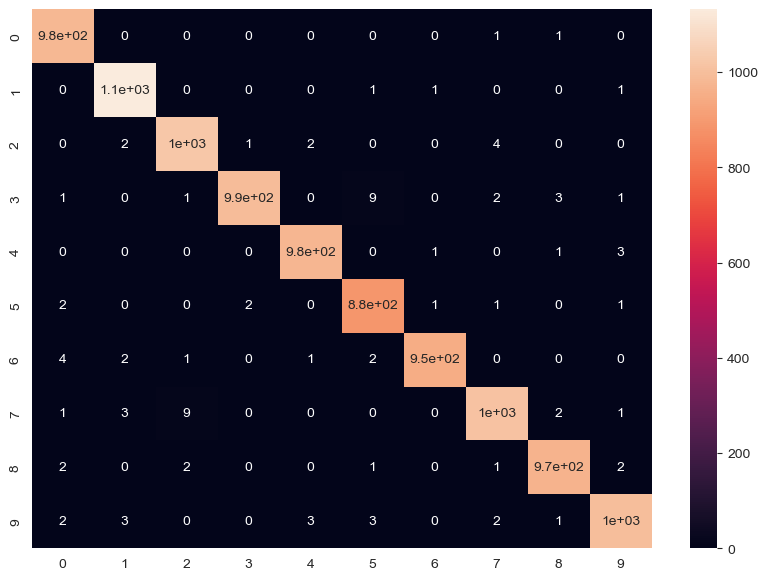

In [13]:
analyze_model(model_conv_relu, x_train, x_test, y_train_categorical, y_test)

## Resnet

In [15]:
from tensorflow.keras.applications.resnet50 import ResNet50

In [20]:
def prepare_data_for_resnet50(data_to_transform):
    data = data_to_transform.copy()
    data = data.reshape(-1, 28, 28) / 255
    data = np.stack([data, data, data], axis=-1)
    return data

In [21]:
X_rgb_train = prepare_data_for_resnet50(x_train)
X_rgb_test = prepare_data_for_resnet50(x_test)

In [22]:
model_resnet = keras.Sequential([
    ResNet50(include_top=False, pooling='avg'),
    keras.layers.Dropout(0.50),
    keras.layers.Dense(10, activation='softmax')
])
model_resnet.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001),
              loss=keras.losses.CategoricalCrossentropy(),
              metrics=[keras.metrics.TopKCategoricalAccuracy(k=1, name="top1"), keras.metrics.TopKCategoricalAccuracy(k=5, name="top5")])

Model fitting...
1875/1875 [==============================] - 44s 22ms/step - loss: 0.5597 - top1: 0.9038 - top5: 0.9893
Single epoch takes 44.640077114105225 seconds
Epoch 1/9
1875/1875 [==============================] - 40s 22ms/step - loss: 0.3503 - top1: 0.9373 - top5: 0.9956
Epoch 2/9
1875/1875 [==============================] - 39s 21ms/step - loss: 0.2048 - top1: 0.9611 - top5: 0.9976
Epoch 3/9
1875/1875 [==============================] - 42s 22ms/step - loss: 0.5189 - top1: 0.9152 - top5: 0.9941
Epoch 4/9
1875/1875 [==============================] - 41s 22ms/step - loss: 0.4781 - top1: 0.9108 - top5: 0.9938
Epoch 5/9
1875/1875 [==============================] - 41s 22ms/step - loss: 0.1912 - top1: 0.9523 - top5: 0.9981
Epoch 6/9
1875/1875 [==============================] - 42s 22ms/step - loss: 0.1702 - top1: 0.9625 - top5: 0.9980
Epoch 7/9
1875/1875 [==============================] - 42s 22ms/step - loss: 0.1350 - top1: 0.9685 - top5: 0.9989
Epoch 8/9
1875/1875 [==============

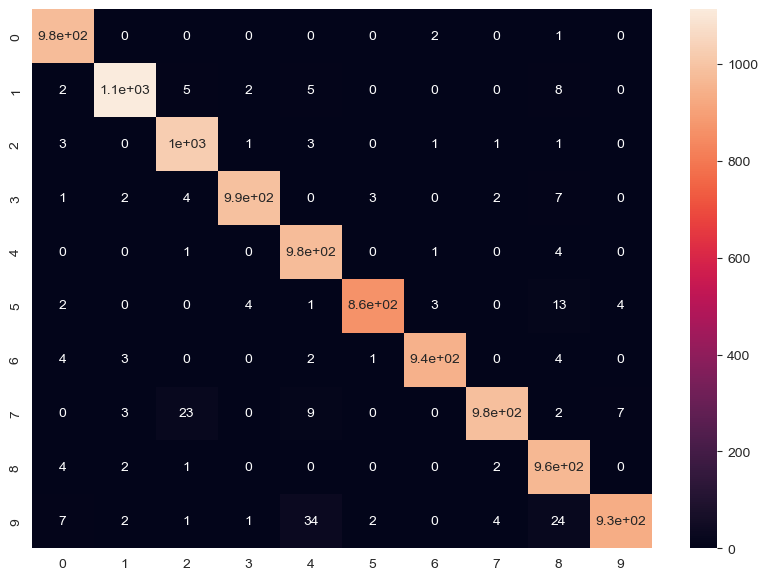

In [23]:
analyze_model(model_resnet, X_rgb_train, X_rgb_test, y_train_categorical, y_test)